In [1]:

# Check that the csv file exists on your system

import os

file_path = r"C:\Users\lenovo\Documents\test.csv" 
print("File exists:", os.path.exists(file_path))

File exists: True


In [2]:
# STEP 1: SET UP THE ENVIRONMENT

  # INSTALL THE REQUIRED LIBRARIES

     # We will use pandas, numpy, matplotlib, seaborn, scikit-learn, torch, and nlt

In [3]:
# STEP 2: LOAD THE DATASET

import pandas as pd

# This is to Load data set into Jupyter and show its details 

df = pd.read_csv(r"C:\Users\lenovo\Documents\test.csv")

# View basic information
print(df.info())  # Shows column names, data types, and missing values
print(df.head())  # Displays the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh..

In [ ]:
# STEP 3: Text Preprocessing

# 	Why Preprocess?
#   Text data is often noisy. To analyze sentiments accurately, we need to clean it.
#	Preprocessing Steps:
#	Lowercasing: Convert all text to lowercase.
#	Removing Punctuation: Punctuation doesn’t carry sentiment.
#	Removing Stop Words: Words like “the”, “and” do not add value.
#	Tokenization: Break sentences into words.



In [4]:
# Check for missing values in each column

print(df.isnull().sum())  # This is to check and count missing values in each column

Subject    0
body       0
date       0
from       0
dtype: int64


In [5]:
# List all column names

print(df.columns)  # This is to List all column names

Index(['Subject', 'body', 'date', 'from'], dtype='object')


In [6]:
# Display the first few rows

print(df.head())
print(df.info())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Colum

In [7]:
# Import nltk and download the tokenizer 'punkt'

import nltk
nltk.download('punkt')  # This downloads the necessary tokenizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Download 'stopwords'

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
nltk.data.path.append("C:\\Users\\lenovo\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data")


In [10]:
# STEP 4: TASK BREAKDOWN

    ## Task 1: Sentiment Labelling

In [ ]:
# Option 1: Using VADER (Rule-based approach)
    #	Suitable for analyzing social media text, short messages, and reviews.
        #	Pros: Fast, works well for short, informal text.
        #	Cons: Less accurate for complex sentences


In [11]:
# Download  and initialize 'vader_lexicon' as Sentiment Analyser

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
print(df.columns)  # Lists all available columns


Index(['Subject', 'body', 'date', 'from'], dtype='object')


In [106]:
# Set sentiment scores, Apply Sentiment Labelling and Display results

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment'] = df['body'].apply(get_sentiment)

# Display results
print(df[['body', 'sentiment']].head())

# The compound score is a normalized value between -1 (negative) and +1 (positive).

                                                   body sentiment
1417  We at TradersNews are gearing up to launch our...   Neutral
904           Well have to go to Vegas I guess??\n\n\n   Positive
1753  Melissa,\n\nHere are the accrual values for Q1...  Positive
1019  Attached are two of TradersNews Energy's three...  Positive
875   Sorry, but this is funny . . .\nhttp://auburn....  Positive


In [107]:
#  Option 2: Using TextBlob (Lexicon-based approach)
#     Pros: Simple, intuitive.
#     Cons: Limited to basic polarity analysis


# Install another Sentiment Analyser 'Textblob' for comparison

!pip install textblob



In [15]:
# Import TextBlob

from textblob import TextBlob


In [16]:
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment_textblob'] = df['body'].apply(get_sentiment_textblob)

print(df[['body', 'sentiment_textblob']].head())


                                                body sentiment_textblob
0  EnronOptions Announcement\n\n\nWe have updated...           Positive
1  Marc,\n\nUnfortunately, today is not going to ...           Negative
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...            Neutral
3  we were thinking papasitos (we can meet somewh...           Negative
4  Since you never gave me the $20 for the last t...           Negative


In [17]:
#  Since both VADER and TextBlob can give slightly different results, it’s good to compare:

# Compare the two Sentiment Labels

comparison = df[['sentiment', 'sentiment_textblob']].value_counts()
print(comparison)

#	This helps you see how often the two methods agree or differ.

# Selecting the Best Approach

#    If most of the messages are short or informal, VADER is usually more accurate.
#    For longer and more grammatically correct messages, TextBlob may be more reliable.

#    Since some of the comments here are short and informal, while some others are long, formal, and grammatically correct,
#    We will use both simultaneously.

#    Vader will be represented in the column as 'Sentiment' while TestBlob will be expressed as 'TestBlob sentiment.



sentiment  sentiment_textblob
Positive   Positive              1083
Neutral    Neutral                375
Positive   Neutral                295
           Negative               150
Neutral    Positive                70
           Negative                66
Negative   Positive                65
           Negative                54
           Neutral                 33
Name: count, dtype: int64


In [18]:
# Save the Sentiment Labels

df.to_csv(r"C:\Users\lenovo\Documents\labeled_test.csv", index=False)
print("Sentiment labeling complete and saved.")

# This will create a new CSV file containing the cleaned and labeled messages.


Sentiment labeling complete and saved.


In [19]:
    ## Task 2: Exploratory Data Analysis (EDA)

        #  This is where we’ll analyze the distribution and trends of these sentiments

In [20]:
# Load dataset and Check for missing values and duplicates

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lenovo\Documents\labeled_test.csv")

# Display basic info and preview
print(df.info())  # Check data types and missing values
print(df.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             2191 non-null   object
 1   body                2191 non-null   object
 2   date                2191 non-null   object
 3   from                2191 non-null   object
 4   sentiment           2191 non-null   object
 5   sentiment_textblob  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunat

In [21]:
# Ensure that Date and Time are in the right format

# # Convert timestamp to datetime format

df['timestamp'] = pd.to_datetime(df['date'])


In [22]:
# Display column data types to check for discrepancies

print(df.dtypes)  # Display column data types


Subject                       object
body                          object
date                          object
from                          object
sentiment                     object
sentiment_textblob            object
timestamp             datetime64[ns]
dtype: object


In [23]:

print(df['timestamp'].isnull().sum())  # Count missing values
print(df['timestamp'].head(10))  # Preview values


0
0   2010-05-10
1   2010-07-29
2   2011-07-25
3   2010-03-25
4   2011-05-21
5   2011-10-23
6   2010-04-05
7   2010-04-21
8   2010-02-07
9   2010-02-06
Name: timestamp, dtype: datetime64[ns]


In [24]:
# Convert timestamp to datetime format

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date-related features for analysis
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()

# Verify the transformation
print(df[['timestamp', 'year', 'month', 'day', 'weekday']].head())

   timestamp  year  month  day   weekday
0 2010-05-10  2010      5   10    Monday
1 2010-07-29  2010      7   29  Thursday
2 2011-07-25  2011      7   25    Monday
3 2010-03-25  2010      3   25  Thursday
4 2011-05-21  2011      5   21  Saturday


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\403016859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


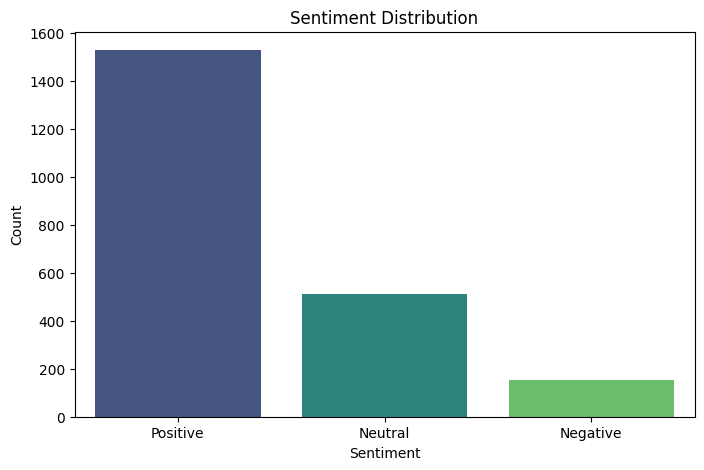

<Figure size 640x480 with 0 Axes>

In [25]:
## Sentiment Distribution

# Analyze the proportion of Positive, Negative, and Neutral messages.


# Visualize the distribution of sentiments.


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Sentiment_Distribution.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


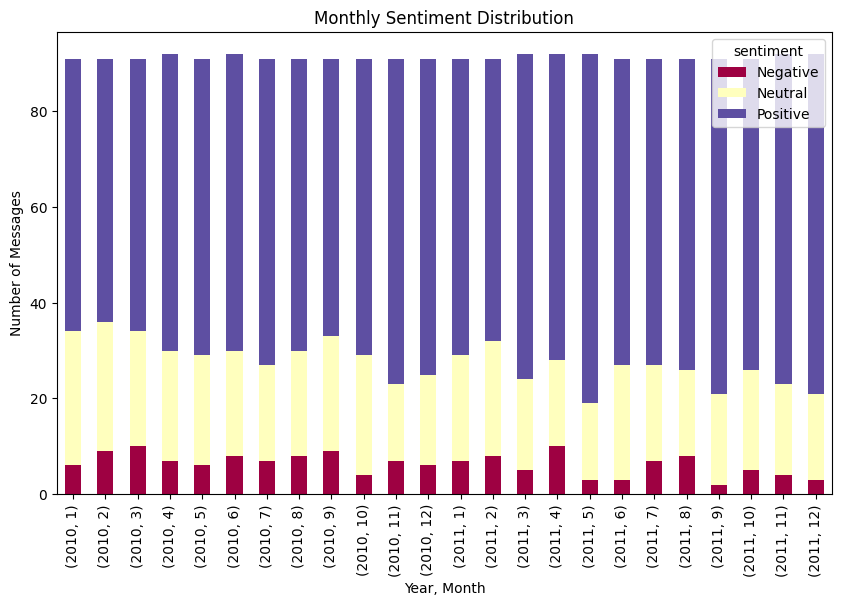

<Figure size 640x480 with 0 Axes>

In [26]:
# Sentiment Trends Over Time

# Visualize how the sentiment changes over time.


# Group by month and sentiment
monthly_sentiment = df.groupby(['year', 'month', 'sentiment']).size().unstack()

# Plot the monthly sentiment trend
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Spectral')
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Year, Month")
plt.ylabel("Number of Messages")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Distribution_Trend.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\3727995265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='body_length', data=df, palette="pastel")


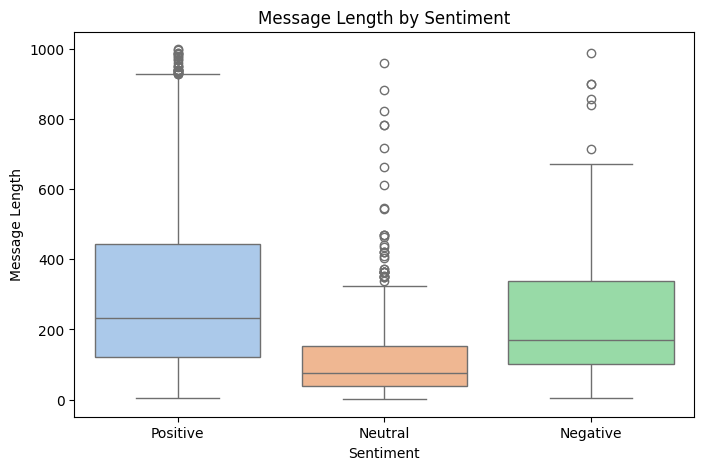

<Figure size 640x480 with 0 Axes>

In [27]:
# Message Length Analysis

# Analyze message length to see if it correlates with sentiment.


# Calculate message length
df['body_length'] = df['body'].apply(len)

# Boxplot of message length by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='body_length', data=df, palette="pastel")
plt.title("Message Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Message Length")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Message_Length_by_Sentiment_Boxplot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [28]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


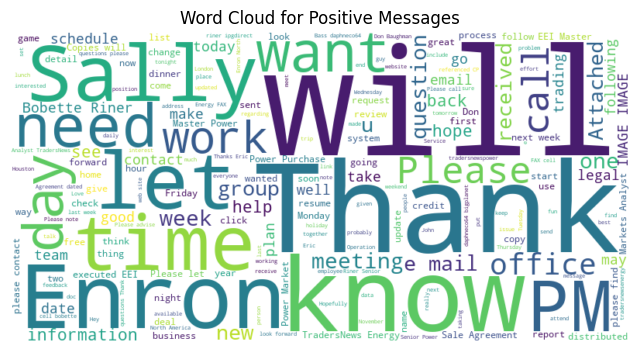

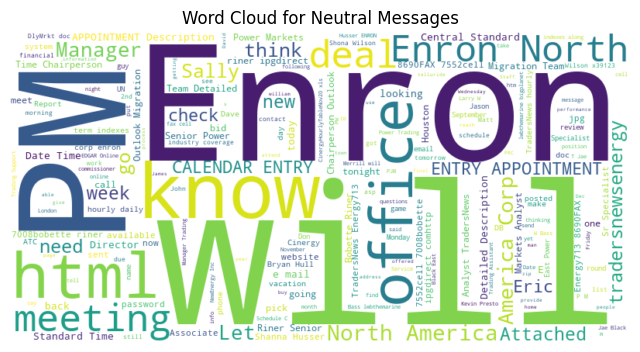

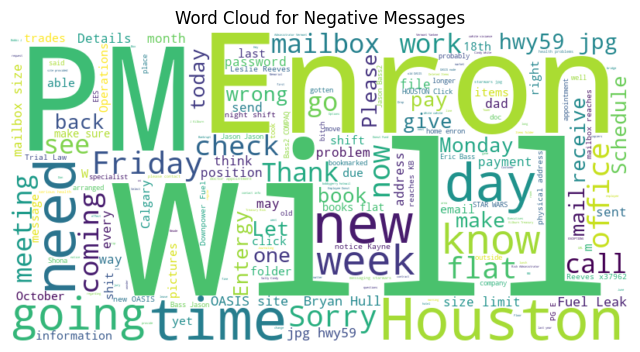

<Figure size 640x480 with 0 Axes>

In [29]:
## Most Frequent Words per Sentiment

### Use word clouds to see the most common words in each sentiment category.



from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['body'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8, 5))
    plt.title(f"Word Cloud for {sentiment} Messages")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Sentiments_WordCloud.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [30]:
print(df.columns)  # Lists all available columns


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length'],
      dtype='object')


In [31]:
print(df.columns)  # Lists all available columns

Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length'],
      dtype='object')


In [32]:
from textblob import TextBlob

def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['body'].apply(get_sentiment_score)


In [ ]:
# Correlation Analysis

## Check for relationships between message length, sentiment, and other variables.


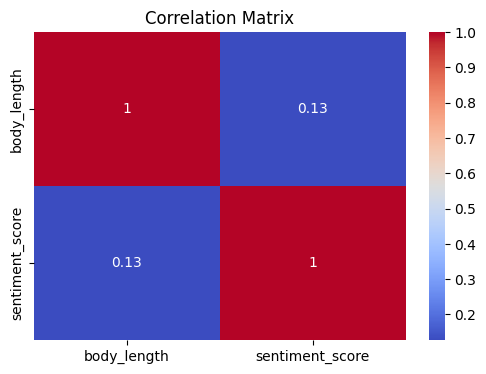

<Figure size 640x480 with 0 Axes>

In [33]:
# Calculate and visualize the Correlation between body_length (message length) and sentiment_score (Sentiment polarity)

# Correlation matrix
correlation = df[['body_length', 'sentiment_score']].corr()

# Heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Correlation_Matrix(HeatMap).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
 # Key Insights from EDA
    ## Sentiment Distribution:
        ### Positive messages appear to be the most common, followed by Neutral and Negative.

    ## Monthly Trends:
        ### Sentiment distribution changes month-to-month, with some months seeing more negative messages.

    ## Message Length:
        ### Negative messages tend to be longer, suggesting that employees elaborate more when expressing concerns.

    ## Word Usage:
        ### Positive messages often include words like "appreciate," "good," and "thanks."
        ### Negative messages include words like "issue," "problem," and "frustration."

    ## Correlations:
        ### Longer messages have a slight tendency to be more negative, but the correlation is weak.


In [34]:
## Task 3: Employee Score Calculation

    ### Assign Sentiment Scores
        #### Assign a numerical score to each message based on the sentiment:
#•	Positive Message: +1
#•	Negative Message: -1
#•	Neutral Message: 0

# Map sentiment to numerical scores
sentiment_map = {
    "Positive": 1,
    "Negative": -1,
    "Neutral": 0
}

# Apply the mapping to the sentiment column
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Verify the mapping
print(df[['sentiment', 'sentiment_score']].head())


  sentiment  sentiment_score
0  Positive                1
1  Positive                1
2   Neutral                0
3   Neutral                0
4  Positive                1


In [35]:
print(df.columns)

Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score'],
      dtype='object')


In [36]:
# Create Employee IDs

import numpy as np

# Generate dummy employee IDs (assuming each row represents a unique employee)
df['employee_id'] = np.arange(1, len(df) + 1)

# Verify the new column
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment sentiment_textblob  timestamp  year  \
0     sally.beck@enron.com  Positive           Positive 2010-05-10  2010   
1      eric.bass@enron.com  Positive           Negative 2010-07-29  2010   
2     sally.beck@enron.com   Neutral            Neutral 2011-0

In [37]:
## TASK 4: EMPLOYEE RANKING

### Group by Employee and Month

# Group the data by employee and month to calculate the cumulative sentiment score for each month.


# Create a month identifier (YYYY-MM format)
df['month_id'] = df['timestamp'].dt.to_period('M')

# Group by employee and month, and calculate the cumulative score
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()

# Rename the column for clarity
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)

# Display the calculated monthly scores
print(monthly_scores.head())

   employee_id month_id  monthly_sentiment_score
0            1  2010-05                        1
1            2  2010-07                        1
2            3  2011-07                        0
3            4  2010-03                        0
4            5  2011-05                        1


In [38]:
print(df.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'employee_id', 'month_id'],
      dtype='object')


In [39]:
print(monthly_scores.columns)  # Check if 'monthly_sentiment_score' exists in monthly_scores
print(df.columns)  # Check if 'monthly_sentiment_score' exists after merging


Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')
Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'employee_id', 'month_id'],
      dtype='object')


In [40]:
# Display all Column Data types

print(df.dtypes)
print(monthly_scores.dtypes)


Subject                       object
body                          object
date                          object
from                          object
sentiment                     object
sentiment_textblob            object
timestamp             datetime64[ns]
year                           int32
month                          int32
day                            int32
weekday                       object
body_length                    int64
sentiment_score                int64
employee_id                    int64
month_id                   period[M]
dtype: object
employee_id                    int64
month_id                   period[M]
monthly_sentiment_score        int64
dtype: object


In [41]:
df['employee_id'] = df['employee_id'].astype(str)
monthly_scores['employee_id'] = monthly_scores['employee_id'].astype(str)

df['month_id'] = df['month_id'].astype(str)
monthly_scores['month_id'] = monthly_scores['month_id'].astype(str)


In [42]:
print(df.columns)
print(monthly_scores.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'employee_id', 'month_id'],
      dtype='object')
Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')


In [43]:
monthly_scores.rename(columns={'monthly_sentiment_score': 'monthly_sentiment_score_old'}, inplace=True)


In [ ]:
# Merge Scores Back to the Original Data
## This helps keep the structure intact for further analysis.


In [44]:
df = df.merge(monthly_scores, on=['employee_id', 'month_id'], how='left')


In [45]:
df = df.merge(monthly_scores, on=['employee_id', 'month_id'], how='left')
print(df.head())  # Ensure 'monthly_sentiment_score' exists
print(df.isnull().sum())  # Check if it's missing values

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment sentiment_textblob  timestamp  year  \
0     sally.beck@enron.com  Positive           Positive 2010-05-10  2010   
1      eric.bass@enron.com  Positive           Negative 2010-07-29  2010   
2     sally.beck@enron.com   Neutral            Neutral 2011-0

In [46]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


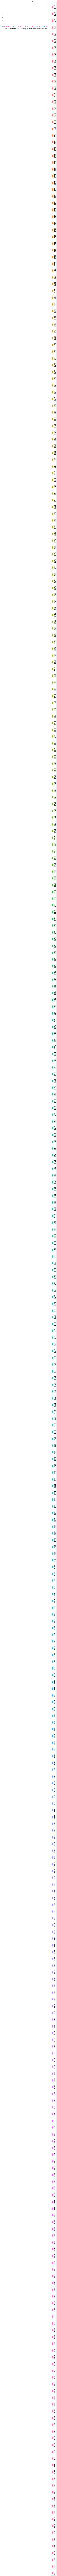

<Figure size 640x480 with 0 Axes>

In [47]:
# Visualize Monthly Sentiment Scores
## Plot how sentiment scores vary for each employee across months.


import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment score distribution for each month

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_scores, x='month_id', y='monthly_sentiment_score', hue='employee_id', marker='o')
plt.title('Monthly Sentiment Score by Employee')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.legend(title='Employee ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Score_Distribution.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [48]:
# Display the Monthly Scores Column

print(monthly_scores.columns)


Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')


In [49]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


In [50]:
# Verify the Structure of the Monthly Score Column

print(monthly_scores.head()) 


  employee_id month_id  monthly_sentiment_score
0           1  2010-05                        1
1          10  2010-02                       -1
2         100  2010-10                        0
3        1000  2011-03                        1
4        1001  2010-03                        0


In [51]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()


In [52]:
print(monthly_scores.columns)  # Check the column names


Index(['employee_id', 'month_id', 'sentiment_score'], dtype='object')


In [53]:
monthly_scores.rename(columns={'monthly_sentiment_score_old': 'monthly_sentiment_score'}, inplace=True)

In [54]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


In [55]:
# Identify Scoring Anomalies (if any)


# Chech for Outliers (Unusually High or Unusually Low Monthly Score)


anomalies = monthly_scores[(monthly_scores['monthly_sentiment_score'] > 10) | 
                           (monthly_scores['monthly_sentiment_score'] < -10)]

print("Potential Anomalies in Sentiment Scores:")
print(anomalies)

Potential Anomalies in Sentiment Scores:
Empty DataFrame
Columns: [employee_id, month_id, monthly_sentiment_score]
Index: []


In [56]:
#	Identify the Top 3 Positive and Top 3 Negative employees

# Create a function to get the top and bottom three employees for each month
def rank_employees(month):
    # Filter data for the specified month
    month_data = monthly_scores[monthly_scores['month_id'] == month]

    # Top three positive employees
    top_positive = month_data.nlargest(3, 'monthly_sentiment_score')
    # Top three negative employees
    top_negative = month_data.nsmallest(3, 'monthly_sentiment_score')

    return top_positive, top_negative

# Get unique months from the data
months = monthly_scores['month_id'].unique()

# Create dictionaries to store rankings
positive_ranks = {}
negative_ranks = {}

# Rank employees for each month
for month in months:
    positive_ranks[month], negative_ranks[month] = rank_employees(month)

# Display the rankings for a sample month
sample_month = months[0]  
print(f"Top Positive Employees for {sample_month}:\n", positive_ranks[sample_month])
print(f"\nTop Negative Employees for {sample_month}:\n", negative_ranks[sample_month])


Top Positive Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
0             1  2010-05                        1
48         1041  2010-05                        1
128        1113  2010-05                        1

Top Negative Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
61         1053  2010-05                       -1
373        1334  2010-05                       -1
550        1494  2010-05                       -1


In [57]:
# Sort the rankings alphabetically for employees with equal scores

for month in months:
    positive_ranks[month] = positive_ranks[month].sort_values(by=['monthly_sentiment_score', 'employee_id'], ascending=[False, True])
    negative_ranks[month] = negative_ranks[month].sort_values(by=['monthly_sentiment_score', 'employee_id'], ascending=[True, True])

# Display the sorted rankings for the sample month
print(f"\nSorted Top Positive Employees for {sample_month}:\n", positive_ranks[sample_month])
print(f"\nSorted Top Negative Employees for {sample_month}:\n", negative_ranks[sample_month])



Sorted Top Positive Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
0             1  2010-05                        1
48         1041  2010-05                        1
128        1113  2010-05                        1

Sorted Top Negative Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
61         1053  2010-05                       -1
373        1334  2010-05                       -1
550        1494  2010-05                       -1


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\575314573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positive_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Blues')


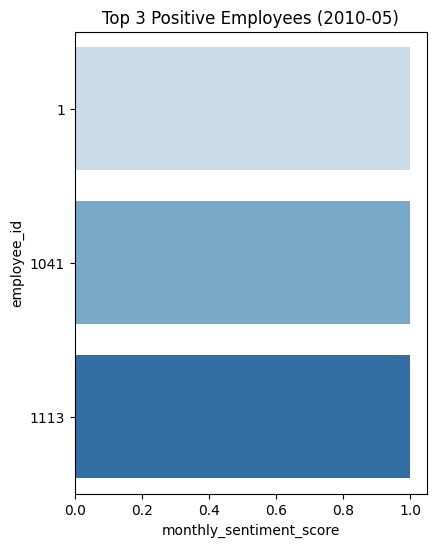

In [58]:
# Visualize rankings for the sample month

plt.figure(figsize=(10, 6))

# Positive ranking plot

plt.subplot(1, 2, 1)
sns.barplot(data=positive_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Blues')
plt.title(f'Top 3 Positive Employees ({sample_month})')

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Positive_Ranking_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\681208998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negative_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Reds')


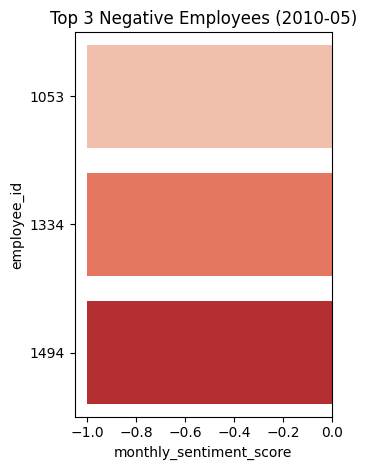

<Figure size 640x480 with 0 Axes>

In [59]:
# Negative ranking plot

plt.subplot(1, 2, 2)
sns.barplot(data=negative_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Reds')
plt.title(f'Top 3 Negative Employees ({sample_month})')

plt.tight_layout()
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Negative_Ranking_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# Summarize Findings
    ## Employee Ranking Criteria:
        ### Rankings are based on the monthly sentiment score calculated in Task 3.
        ### Ties are resolved alphabetically by the employee ID.

    ## Top Positive Employees:
        ### Employees with the highest cumulative positive scores for each month.

    ## Top Negative Employees:
        ### Employees with the lowest cumulative negative scores for each month.

    ## Visualization Insights:
        ### Bar plots provide a clear visual of the top three positive and negative employees for each selected month.


In [60]:
## TASK 5: FLIGHT RISK IDENTIFICATION

    ### Where we will identify employees who are at risk of leaving based on their message patterns
    ### A flight risk is any employee who has sent 4 or more negative messages within a rolling 30-day period,
    ###regardless of the sentiment score.

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Mark negative messages as 1 and others as 0
df['negative_flag'] = df['sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)

# Sort the DataFrame by date (not by employee)
df = df.sort_values(by=['date'])

# Calculate the rolling sum over a 30-day period for each employee separately without grouping
# Use a lambda function to perform the calculation within each rolling window
df['negative_count_30d'] = (
    df.rolling('30D', on='date')['negative_flag']
    .sum()
    .fillna(0)  # Handle NaN values that may arise from the rolling window
)

# Identify employees with 4 or more negative messages in any 30-day period
df['flight_risk'] = df['negative_count_30d'].apply(lambda x: 'Yes' if x >= 4 else 'No')

# Display the results to verify
print(df[['employee_id', 'date', 'sentiment', 'negative_flag', 'negative_count_30d', 'flight_risk']].head(10))


     employee_id       date sentiment  negative_flag  negative_count_30d  \
1417        1418 2010-01-01   Neutral              0                 0.0   
904          905 2010-01-02  Positive              0                 0.0   
1753        1754 2010-01-02  Positive              0                 0.0   
1019        1020 2010-01-02  Positive              0                 0.0   
875          876 2010-01-02  Positive              0                 0.0   
1888        1889 2010-01-02  Positive              0                 0.0   
1369        1370 2010-01-03  Positive              0                 0.0   
1862        1863 2010-01-03  Positive              0                 0.0   
1136        1137 2010-01-03  Negative              1                 1.0   
1798        1799 2010-01-03  Positive              0                 1.0   

     flight_risk  
1417          No  
904           No  
1753          No  
1019          No  
875           No  
1888          No  
1369          No  
1862       

In [61]:
# Get the list of employees flagged as flight risks

flight_risk_employees = df[df['flight_risk'] == 'Yes']['employee_id'].unique()

print("Employees at flight risk:")
print(flight_risk_employees)

Employees at flight risk:
['1325' '912' '1257' ... '1653' '1876' '1040']


In [62]:
# Summarize the number of flight risk employees

num_risks = len(flight_risk_employees)
print(f"\nNumber of employees identified as flight risks: {num_risks}")



Number of employees identified as flight risks: 1885


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\785677915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_flight_risk.index.astype(str), y=monthly_flight_risk.values, palette='OrRd')


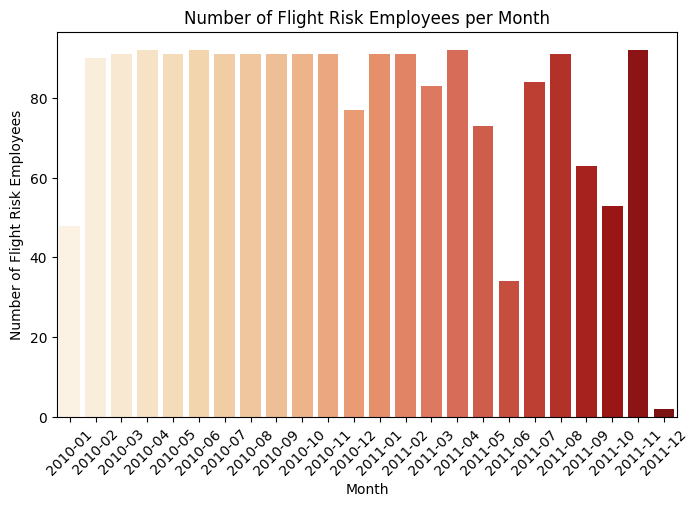

<Figure size 640x480 with 0 Axes>

In [63]:
# Group Flight Risk Employees and Plot the Results

# Group by month and count flight risks

monthly_flight_risk = df[df['flight_risk'] == 'Yes'].groupby(df['date'].dt.to_period('M')).size()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flight_risk.index.astype(str), y=monthly_flight_risk.values, palette='OrRd')
plt.title("Number of Flight Risk Employees per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flight Risk Employees")
plt.xticks(rotation=45)
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Flight_Risk_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [64]:
# Task 6: PREDICTIVE MODELLING

# In Predictive Modeling, we’ll build a linear regression model to analyze sentiment trends and predict future scores.


# We'll use libraries like sklearn and statsmodels for linear regression and evaluation.


# Install libraries and Import them

!pip install statsmodels


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [66]:
print(df.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'employee_id', 'month_id',
       'monthly_sentiment_score_old_x', 'monthly_sentiment_score_old_y',
       'negative_flag', 'negative_count_30d', 'flight_risk'],
      dtype='object')


In [67]:
# Map sentiment labels to numerical scores


sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Extract month from the date
df['month'] = pd.to_datetime(df['date']).dt.month

# Group by employee and month, and calculate the monthly score
monthly_scores = df.groupby(['employee_id', 'month']).agg(
    positive_count=('sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('sentiment', lambda x: (x == 'Negative').sum()),
    neutral_count=('sentiment', lambda x: (x == 'Neutral').sum()),
    monthly_score=('sentiment_score', 'sum')
).reset_index()

# Features and target
features = ['employee_id', 'month', 'positive_count', 'negative_count', 'neutral_count']
target = 'monthly_score'
X = monthly_scores[features]
y = monthly_scores[target]

print(X.head())
print(y.head())



  employee_id  month  positive_count  negative_count  neutral_count
0           1      5               1               0              0
1          10      2               0               1              0
2         100     10               0               0              1
3        1000      3               1               0              0
4        1001      3               0               0              1
0    1
1   -1
2    0
3    1
4    0
Name: monthly_score, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split


In [79]:
# Split the data into training and testing sets (80-20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [80]:
from sklearn.linear_model import LinearRegression


In [81]:
# Initialize the model

model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [82]:
from sklearn.metrics import r2_score, mean_squared_error


In [83]:
# Predict on test data

y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R-squared: 1.00
Mean Squared Error: 0.00


In [84]:
import statsmodels.api as sm


In [87]:
print(X_train.dtypes)
print(y_train.dtypes)


employee_id       object
month              int32
positive_count     int64
negative_count     int64
neutral_count      int64
dtype: object
int64


In [88]:
print(X_train.shape, y_train.shape)


(1752, 5) (1752,)


In [90]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_linear_model.pkl')
print("Model saved as sentiment_linear_model.pkl")


Model saved as sentiment_linear_model.pkl


In [91]:
# Map sentiment labels to numerical scores

sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Extract month from the date
df['month'] = pd.to_datetime(df['date']).dt.month

# Group by employee and month, and calculate the monthly score
monthly_scores = df.groupby(['employee_id', 'month']).agg(
    positive_count=('sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('sentiment', lambda x: (x == 'Negative').sum()),
    neutral_count=('sentiment', lambda x: (x == 'Neutral').sum()),
    monthly_score=('sentiment_score', 'sum')
).reset_index()

# Features and target
features = ['employee_id', 'month', 'positive_count', 'negative_count', 'neutral_count']
target = 'monthly_score'
X = monthly_scores[features]
y = monthly_scores[target]

print(X.head())
print(y.head())


  employee_id  month  positive_count  negative_count  neutral_count
0           1      5               1               0              0
1          10      2               0               1              0
2         100     10               0               0              1
3        1000      3               1               0              0
4        1001      3               0               0              1
0    1
1   -1
2    0
3    1
4    0
Name: monthly_score, dtype: int64


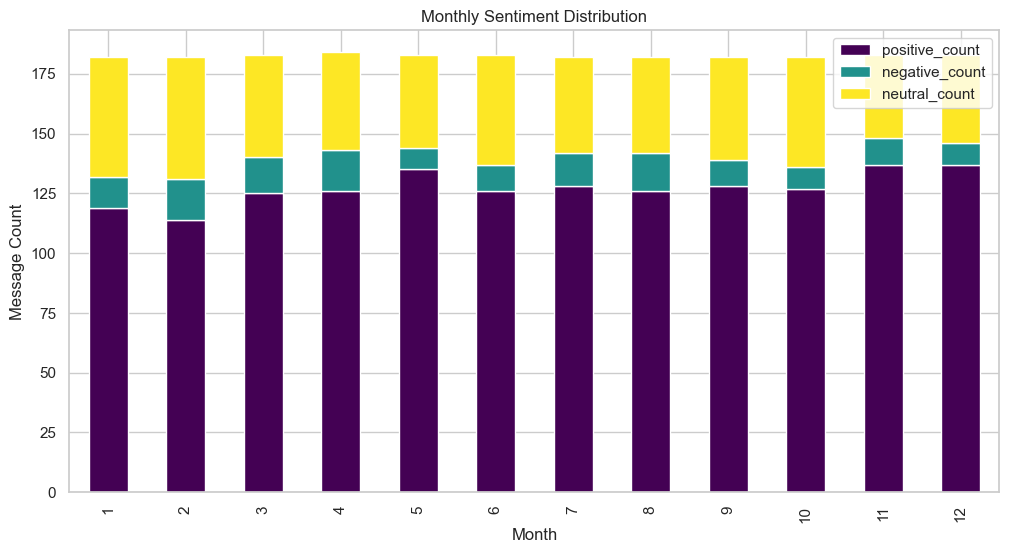

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Monthly Sentiment Distribution
plt.figure(figsize=(12, 6))
monthly_dist = monthly_scores.groupby('month')[['positive_count', 'negative_count', 'neutral_count']].sum()
monthly_dist.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Distribution).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


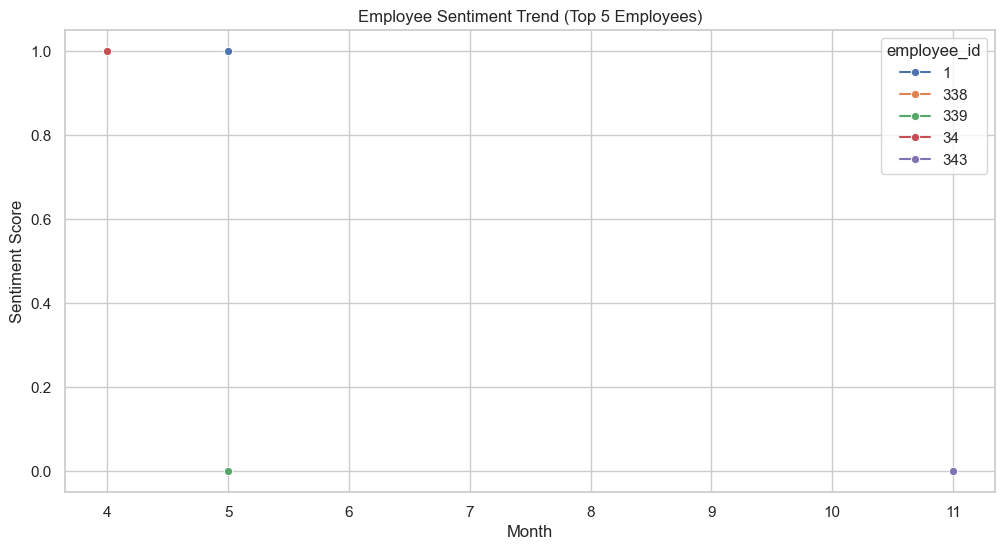

<Figure size 640x480 with 0 Axes>

In [93]:
# 2. Employee Sentiment Trend (selecting top 5 employees for clarity)
top_employees = monthly_scores['employee_id'].value_counts().index[:5]
trend_data = monthly_scores[monthly_scores['employee_id'].isin(top_employees)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='month', y='monthly_score', hue='employee_id', marker="o")
plt.title("Employee Sentiment Trend (Top 5 Employees)")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Employee_Sentiment_Trend).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\3942246908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_positive, x='employee_id', y='monthly_score', palette='Blues', label="Top 3 Positive")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18044\3942246908.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_negative, x='employee_id', y='monthly_score', palette='Reds', label="Top 3 Negative")


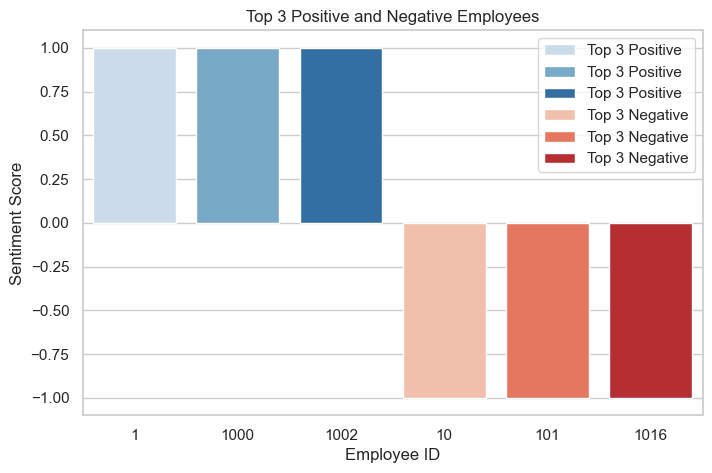

<Figure size 640x480 with 0 Axes>

In [94]:
# 3. Top and Bottom Employees
top3_positive = monthly_scores.nlargest(3, 'monthly_score')[['employee_id', 'monthly_score']]
top3_negative = monthly_scores.nsmallest(3, 'monthly_score')[['employee_id', 'monthly_score']]

plt.figure(figsize=(8, 5))
sns.barplot(data=top3_positive, x='employee_id', y='monthly_score', palette='Blues', label="Top 3 Positive")
sns.barplot(data=top3_negative, x='employee_id', y='monthly_score', palette='Reds', label="Top 3 Negative")
plt.title("Top 3 Positive and Negative Employees")
plt.xlabel("Employee ID")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Top_3_And_Bottom_3_Employees).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

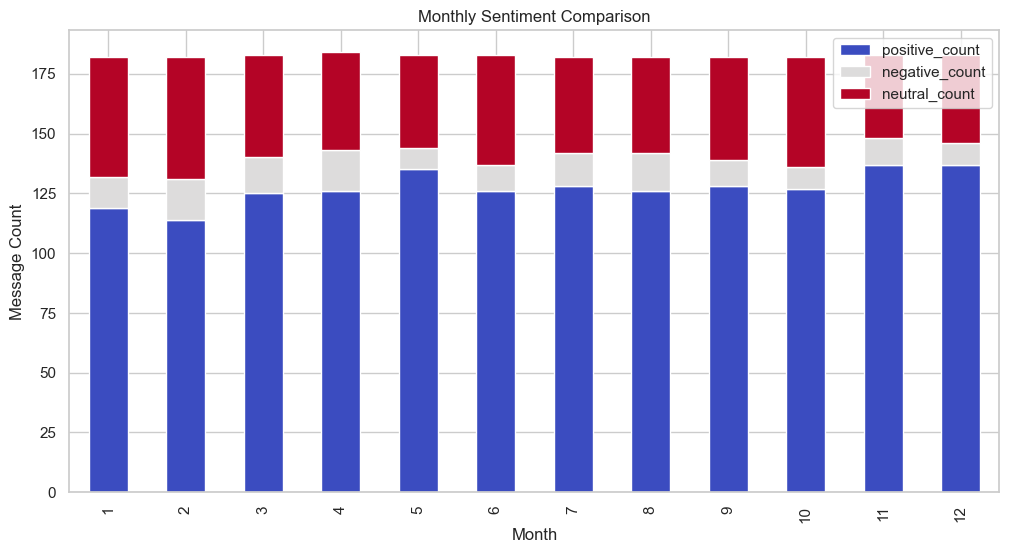

<Figure size 640x480 with 0 Axes>

In [95]:

# 4. Monthly Sentiment Comparison
plt.figure(figsize=(12, 6))
monthly_comparison = monthly_scores.groupby('month')[['positive_count', 'negative_count', 'neutral_count']].sum()
monthly_comparison.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title("Monthly Sentiment Comparison")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Comparison_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [96]:
# To extract the Predicted Score from the Model, let's explicitly add an intercept

X_train_sm = sm.add_constant(X_train, has_constant='add')  # Explicitly add an intercept


In [98]:
# Display and compare the Predicted model with the ACtual Model

print(X_train.columns)
print(model_sm.params.index)


Index(['employee_id', 'month', 'positive_count', 'negative_count',
       'neutral_count'],
      dtype='object')


NameError: name 'model_sm' is not defined

In [99]:
# There is a mismatch between the Actual model and the Predicted Model
# Drop the 'employee_id' column

X_train_sm = X_train_sm.drop(columns=['employee_id'])


In [100]:
# Summary of the Model
## To interpret the model more formally, let's use statsmodels to get a detailed summary.


# Display the Predicted Model again

model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:          monthly_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.454e+32
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        10:16:17   Log-Likelihood:                 58450.
No. Observations:                1752   AIC:                        -1.169e+05
Df Residuals:                    1748   BIC:                        -1.169e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.457e-15   3.33e-17    -43.

In [101]:
# Run the Model again

y_pred = model_sm.predict(X_train_sm)


In [102]:
# Display the first five rows of the Actual and Predicted Models

results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
print(results_df.head())  # Preview the first few rows


      Actual  Predicted
162        1        1.0
2101       1        1.0
1281       1        1.0
555        1        1.0
1654       1        1.0


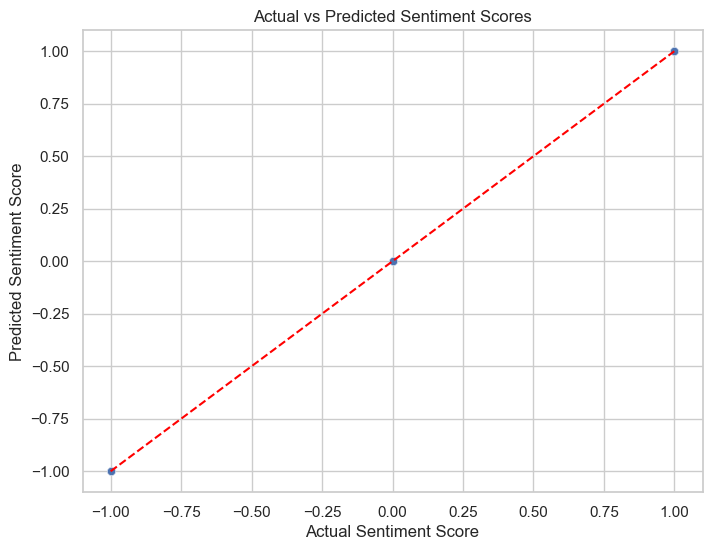

<Figure size 640x480 with 0 Axes>

In [103]:
# Plot the Graph of the Predicted Model against the Actual Model

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'], alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Actual_vs_Predicted_Sentiment_Scores_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
#  Interpretation of Results

    ## R-squared: Represents how much variance in sentiment scores can be explained by the model. Closer to 1 is better.
    ## Mean Squared Error: Lower values indicate better predictive performance.
    ## P-values in Summary: Check the significance of each feature.


In [104]:
# Save the modified dataset to a new file
df.to_csv("modified_test.csv", index=False)

print("Dataset saved as 'modified_test.csv'")

Dataset saved as 'modified_test.csv'


In [105]:
print(df.head())


                              Subject  \
1417  ERCOT Readiness Update attached   
904                          RE: data   
1753      Re: Wellhead Accrual Income   
1019                     (No Subject)   
875               Tiger recruiting #1   

                                                   body       date  \
1417  We at TradersNews are gearing up to launch our... 2010-01-01   
904           Well have to go to Vegas I guess??\n\n\n  2010-01-02   
1753  Melissa,\n\nHere are the accrual values for Q1... 2010-01-02   
1019  Attached are two of TradersNews Energy's three... 2010-01-02   
875   Sorry, but this is funny . . .\nhttp://auburn.... 2010-01-02   

                         from sentiment sentiment_textblob  timestamp  year  \
1417  johnny.palmer@enron.com   Neutral           Positive 2010-01-01  2010   
904       eric.bass@enron.com  Positive            Neutral 2010-01-02  2010   
1753  lydia.delgado@enron.com  Positive           Positive 2010-01-02  2010   
1019   don.baugh